About Dataset

Content

This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.
Attribute Information:

- Date Continuous-time data taken on the first of the month
- Usage_kWh Industry Energy Consumption Continuous kWh
- Lagging Current reactive power Continuous kVarh
- Leading Current reactive power Continuous kVarh
- CO2 Continuous ppm
- NSM Number of Seconds from midnight Continuous S
- Week status Categorical (Weekend (0) or a Weekday(1))
- Day of week Categorical Sunday, Monday : Saturday
- Load Type Categorical Light Load, Medium Load, Maximum Load


*Inspiration*

***Which times of the year is the most energy consumed?***

***What patterns can we identify in energy usage?***


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Steel_industry_data.csv")
df = df.drop(['date'],axis=1)
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
df['Load_Type'].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [4]:
for col in df[['WeekStatus','Day_of_week','Load_Type']]:
    
    print(f"\033[034m\033[1m \n",col)
    print(f"\033[031m\033[1m","====="*5,"\n")
    print(df[col].value_counts())

 
 WeekStatus

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64
 
 Day_of_week

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64
 
 Load_Type

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64


In [5]:
#Rename some columns
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
df.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
# Encode Categorical Columns

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['WeekStatus','Day_of_week'])
df = encoder.fit_transform(df)
df.head(4)

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,Light_Load


In [7]:
df["Load_Type"].replace({"Light_Load":0 ,"Medium_Load":1 ,"Maximum_Load":2} , inplace=True)

In [8]:
df['Load_Type'].value_counts()

0    18072
1     9696
2     7272
Name: Load_Type, dtype: int64

In [9]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
df.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,0


In [10]:
df1 = df[df['Load_Type'] == 2]
df1.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
136,54.79,7.52,0.14,0.0,99.07,100.0,36900,1,2,2
137,53.21,8.35,0.11,0.0,98.79,100.0,37800,1,2,2
138,80.21,32.40,0.00,0.0,92.72,100.0,38700,1,2,2
139,77.58,25.49,0.00,0.0,95.00,100.0,39600,1,2,2
140,128.52,70.85,0.00,0.0,87.57,100.0,40500,1,2,2


In [11]:
df2 = df[df['Load_Type'] == 1]
df2.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
132,56.84,8.32,0.00,0.0,98.95,100.00,33300,1,2,1
133,51.26,4.54,0.94,0.0,99.61,99.98,34200,1,2,1
134,48.13,2.34,1.15,0.0,99.88,99.97,35100,1,2,1
135,52.81,7.06,0.54,0.0,99.12,99.99,36000,1,2,1
144,19.22,5.54,18.90,0.0,96.09,71.30,44100,1,2,1


# Split the dataset and prepare some lists to store the models


In [12]:
# Split the dataset and prepare some lists to store the models
from sklearn.model_selection import train_test_split
X = df.drop(['Load_Type'], axis=1)
y = df['Load_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42) 

## Create a pipeline

In [13]:
#Get the columns name 
df.drop(columns=["Load_Type"]).select_dtypes('number').columns.tolist()

['Usage_kWh',
 'Lagging_Reactive_Power_kVarh',
 'Leading_Reactive_Power_kVarh',
 'CO2',
 'Lagging_Power_Factor',
 'Leading_Power_Factor',
 'NSM',
 'WeekStatus',
 'Day_of_week']

In [14]:
df.dtypes

Usage_kWh                       float64
Lagging_Reactive_Power_kVarh    float64
Leading_Reactive_Power_kVarh    float64
CO2                             float64
Lagging_Power_Factor            float64
Leading_Power_Factor            float64
NSM                               int64
WeekStatus                        int32
Day_of_week                       int32
Load_Type                         int64
dtype: object

In [15]:
"""
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix,classification_report

#Specify Numerical and Categorical Columns for preprocessor 
numerical_features = ['Usage_kWh','Lagging_Reactive_Power_kVarh','Leading_Reactive_Power_kVarh',
                      'CO2','Lagging_Power_Factor','Leading_Power_Factor','NSM']
passthrough_features = ['WeekStatus','Day_of_week']

#Prepare preprocessor
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler()),numerical_features), 
    ("passthrough", passthrough_features),)
    
#Loop for the training model 
model = DecisionTreeClassifier()
 
pipe = make_pipeline(preprocessor, model)
pipe.fit(X_train, y_train)
print(model)
score = pipe.score(X_test, y_test)
print("Model score: %.3f" %score)
"""

'\nfrom sklearn.compose import ColumnTransformer, make_column_transformer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline, make_pipeline\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score, log_loss,confusion_matrix,classification_report\n\n#Specify Numerical and Categorical Columns for preprocessor \nnumerical_features = [\'Usage_kWh\',\'Lagging_Reactive_Power_kVarh\',\'Leading_Reactive_Power_kVarh\',\n                      \'CO2\',\'Lagging_Power_Factor\',\'Leading_Power_Factor\',\'NSM\']\npassthrough_features = [\'WeekStatus\',\'Day_of_week\']\n\n#Prepare preprocessor\npreprocessor = make_column_transformer(\n    (make_pipeline(StandardScaler()),numerical_features), \n    ("passthrough", passthrough_features),)\n    \n#Loop for the training model \nmodel = DecisionTreeClassifier()\n \npipe = make_pipeline(preprocessor, model)\npipe.fit(X_train, y_train)\nprint(model)\nscore = pipe.score(X_test, y_te

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

pipe = KNeighborsClassifier()
pipe.fit(X_train, y_train)
lr_predict = pipe.predict(X_test)
score = accuracy_score(lr_predict, y_test)
print("Model score: %.3f" %score)

Model score: 0.877


In [18]:
input_data = (54.79,7.52,0.14,0.0,99.07,100.0,36900,0,5)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = pipe.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Light Load')
elif (prediction[0] == 1):
    print('Medium Load')
else:
    print('Maximum Load')

[2]
Maximum Load


In [19]:
#Predict the result

y_pred = pipe.predict(X_test)
print(y_pred)

[0 2 2 ... 1 0 0]


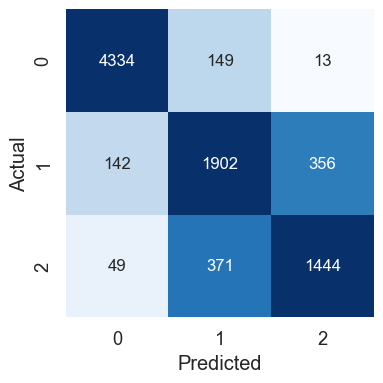

In [20]:
#Draw the confusion matrix with the prediction and actual values 
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix,classification_report

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size

sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap='Blues');

In [21]:
#Build a text report table showing the main classification metrics and its accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4496
           1       0.79      0.79      0.79      2400
           2       0.80      0.77      0.79      1864

    accuracy                           0.88      8760
   macro avg       0.85      0.84      0.85      8760
weighted avg       0.88      0.88      0.88      8760



In [22]:
import pickle

filename = 'df.sav'
pickle.dump(pipe, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('df.sav', 'rb'))